In [34]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import linear_model, datasets

from sklearn.linear_model import LinearRegression


%matplotlib inline
filenaam ="les1opdr5AlFatly.csv"
S=";" # opzoeken in het bestand komma, of punt-komma ; tussen de aanhalingstekens
df=pd.read_csv(filenaam,sep=S)


print(df.columns)
print(df.head(5))

Index(['Age', 'BMIcoefficient', 'BMIwaarde', 'Gender', 'Height (inches)',
       'Height (meter)', 'How would you describe your weight?',
       'IndrukGewichtCoefficient', 'Weight (kg)', 'Weight (lbs)',
       'BMIschattingvergelijking'],
      dtype='object')
    Age  BMIcoefficient  BMIwaarde  Gender  Height (inches)  Height (meter)  \
0  18.0             0.0      23.54  Female             67.0            1.70   
1  17.0             0.0      21.97    Male             67.0            1.70   
2  16.0            -1.0      15.70  Female             67.0            1.70   
3  18.0             2.0      34.04  Female             62.0            1.57   
4  17.0             0.0      23.30    Male             66.0            1.68   

  How would you describe your weight?  IndrukGewichtCoefficient  Weight (kg)  \
0                 Slightly overweight                       2.0        68.04   
1              About the right weight                       1.0        63.50   
2                Slight

In [3]:
#locals:
FemaleHeights = df.loc[df['Gender'] == "Female", 'Height (meter)']
FemaleWeight = df.loc[df['Gender'] == "Female", 'Weight (kg)']
MaleHeights = df.loc[df['Gender'] == "Male", 'Height (meter)']
MaleWeight = df.loc[df['Gender'] == "Male", 'Weight (kg)']

HistogramDataKlassen = ["1,35m - 1,50m", "1,51m - 1,65m", "1,66m - 1,80m", "1,81m - 1,95m", "1,96m - 2,10m"]
#nu het verdelen van lengte per klasse
#vrouwen
HistogramFemaleClassOneCount = df.loc[(df['Gender'] == "Female") & (df['Height (meter)'] >= 1.35) & (df['Height (meter)'] <= 1.50), 'Height (meter)'].count()
#print(HistogramFemaleClassOneCount)
HistogramFemaleClassTwoCount = df.loc[(df['Gender'] == "Female") & (df['Height (meter)'] >= 1.51) & (df['Height (meter)'] <= 1.65), 'Height (meter)'].count()
HistogramFemaleClassThreeCount = df.loc[(df['Gender'] == "Female") & (df['Height (meter)'] >= 1.66) & (df['Height (meter)'] <= 1.80), 'Height (meter)'].count()
HistogramFemaleCFourCount = df.loc[(df['Gender'] == "Female") & (df['Height (meter)'] >= 1.81) & (df['Height (meter)'] <= 1.95), 'Height (meter)'].count()
HistogramFemaleClassFiveCount = df.loc[(df['Gender'] == "Female") & (df['Height (meter)'] >= 1.96) & (df['Height (meter)'] <= 2.10), 'Height (meter)'].count()
#mannen
HistogramMaleClassOneCount = df.loc[(df['Gender'] == "Male") & (df['Height (meter)'] >= 1.35) & (df['Height (meter)'] <= 1.50), 'Height (meter)'].count()
HistogramMaleClassTwoCount = df.loc[(df['Gender'] == "Male") & (df['Height (meter)'] >= 1.51) & (df['Height (meter)'] <= 1.65), 'Height (meter)'].count()
HistogramMaleClassThreeCount = df.loc[(df['Gender'] == "Male") & (df['Height (meter)'] >= 1.66) & (df['Height (meter)'] <= 1.80), 'Height (meter)'].count()
HistogramMaleCFourCount = df.loc[(df['Gender'] == "Male") & (df['Height (meter)'] >= 1.81) & (df['Height (meter)'] <= 1.95), 'Height (meter)'].count()
HistogramMaleClassFiveCount = df.loc[(df['Gender'] == "Male") & (df['Height (meter)'] >= 1.96) & (df['Height (meter)'] <= 2.10), 'Height (meter)'].count()

HistogramData = {
    "Class": ["1,35m-1,50m","1,51m-1,65m","1,66m-1,80m","1,81m-1,95m","1,96m-2,10m"],
    "FemaleHeight": [HistogramFemaleClassTwoCount, HistogramFemaleClassTwoCount, HistogramFemaleClassThreeCount, HistogramFemaleCFourCount, HistogramFemaleClassFiveCount],
    "MaleHeight": [HistogramMaleClassOneCount, HistogramMaleClassTwoCount, HistogramMaleClassThreeCount, HistogramMaleCFourCount, HistogramMaleClassFiveCount]
}

Tdf=pd.DataFrame(HistogramData,
                         index=pd.Index([1, 2, 3, 4, 5], name="index"),
                         columns=pd.Index(["Class", "FemaleHeight", "MaleHeight"], name='attributes')
                         )
#l = np.arange(len(Tdf['Class']))
X = np.arange(len(Tdf['Class']))


height = df.groupby('Age')['Height (meter)'].agg(['count', 'min', 'max', 'mean'])
weight = df.groupby('Age')['Weight (kg)'].agg(['count', 'min', 'max', 'mean'])

print(Tdf)

attributes        Class  FemaleHeight  MaleHeight
index                                            
1           1,35m-1,50m           318           0
2           1,51m-1,65m           318          64
3           1,66m-1,80m           140         301
4           1,81m-1,95m             1         129
5           1,96m-2,10m             0           4


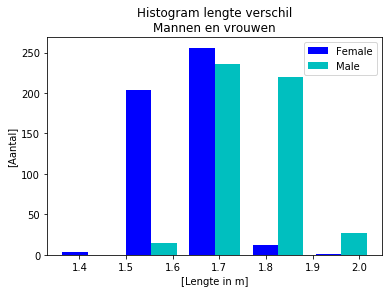

In [5]:
#lengte
plt.hist([FemaleHeights,MaleHeights], bins=5, color=["b", "c"], label=["Female","Male"])

plt.xlabel("[Lengte in m]")
plt.ylabel("[Aantal]")
plt.title("Histogram lengte verschil\nMannen en vrouwen")
plt.legend()
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

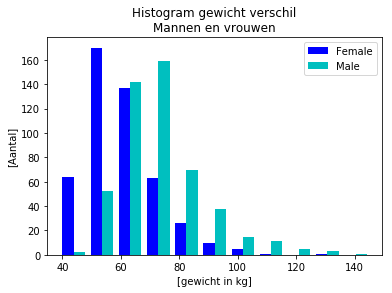

In [6]:
#gewicht
plt.hist([FemaleWeight,MaleWeight], bins=11, color=["b", "c"], label=["Female","Male"])

plt.xlabel("[gewicht in kg]")
plt.ylabel("[Aantal]")
plt.title("Histogram gewicht verschil\nMannen en vrouwen")
plt.legend()
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

In [7]:
#boxplot met uitleg?

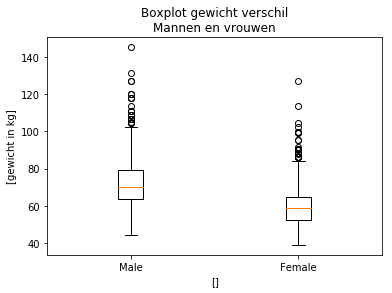

In [8]:
#gemiddelde gewicht mannen en vrouwen
plt.boxplot([MaleWeight, FemaleWeight], labels=["Male", "Female"])
plt.xlabel("[]")
plt.ylabel("[gewicht in kg]")
plt.title("Boxplot gewicht verschil\nMannen en vrouwen")
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

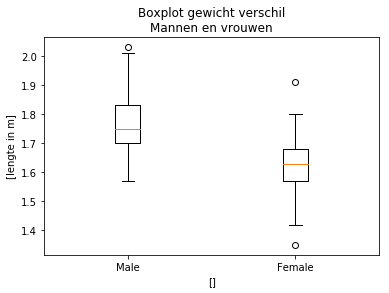

In [9]:
#gemiddelde lengte mannen en vrouwen
plt.boxplot([MaleHeights, FemaleHeights], labels=["Male", "Female"])
plt.xlabel("[]")
plt.ylabel("[lengte in m]")
plt.title("Boxplot gewicht verschil\nMannen en vrouwen")
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

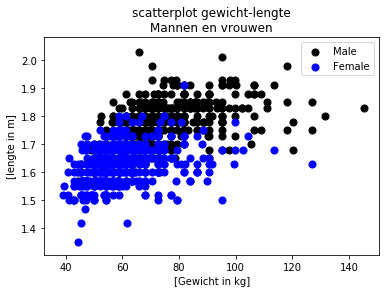

In [10]:
#scatterplot(punten plot)
plt.scatter(MaleWeight,MaleHeights, label="Male", color="k", s=50)
plt.scatter(FemaleWeight,FemaleHeights, label="Female", color="b", s=50)
plt.xlabel("[Gewicht in kg]")
plt.ylabel("[lengte in m]")
plt.title("scatterplot gewicht-lengte\nMannen en vrouwen")
plt.legend()
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

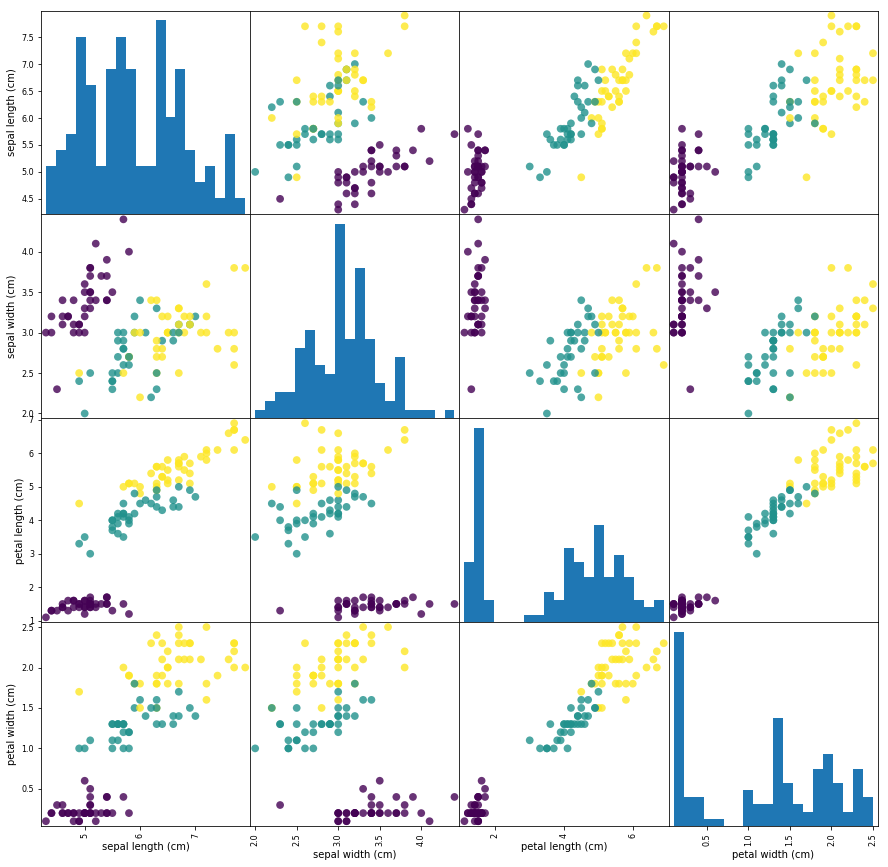

In [11]:
#scattermatrix(neem andere kolommen of neem andere dataset)
#test
iris_dataset = load_iris()

X_train,X_test,Y_train,Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],
                                                 random_state=0)
iris_dataframe = pd.DataFrame(X_train,
                              columns=iris_dataset.feature_names)

grr = scatter_matrix(iris_dataframe,c = Y_train,figsize = (15,15),marker = 'o',
                        hist_kwds={'bins':20},s=60,alpha=.8) #,cmap = mglearn.cm3
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')


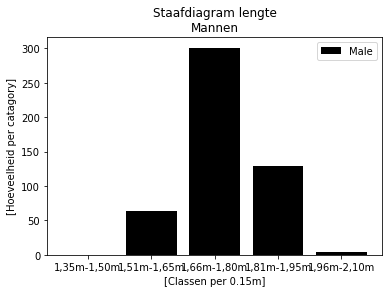

In [13]:
plt.bar(Tdf["Class"], Tdf["MaleHeight"] , label="Male", color="k")
plt.xlabel("[Classen per 0.15m]")
plt.ylabel("[Hoeveelheid per catagory]")
plt.title("Staafdiagram lengte\nMannen")
plt.legend()
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

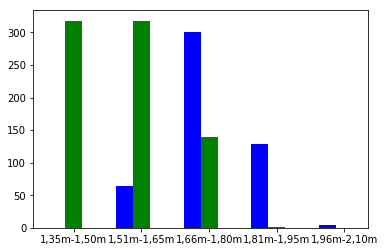

In [14]:
breedte=0.25
plt.xticks(X, Tdf['Class'])
plt.bar(X - breedte, Tdf["MaleHeight"], color = 'b', width=breedte)
plt.bar(X + 0.0, Tdf["FemaleHeight"], color = 'g', width=breedte)
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

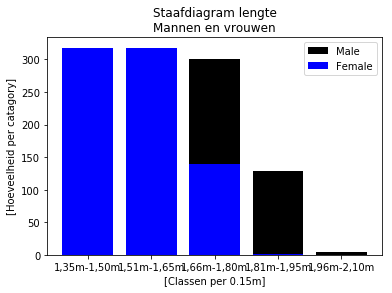

In [15]:

plt.xticks(X, Tdf['Class'])
plt.bar(X, Tdf["MaleHeight"], label="Male", color="k")
plt.bar(X, Tdf["FemaleHeight"], label="Female", color="b")

plt.xlabel("[Classen per 0.15m]")
plt.ylabel("[Hoeveelheid per catagory]")
plt.title("Staafdiagram lengte\nMannen en vrouwen")
plt.legend()
plt.show()
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')

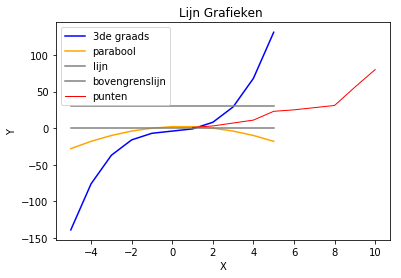

In [16]:
#polyfit test:
def derdegraad(x):
    return x**3+2*x-4

#def Tweedegraad(x):
#    return x**2+x-4

def horiontalelijn(x):
    y=lijn(0,x,0)
    return y
def bovengrenslijn(x):
    y = lijn(0, x, 30)
    return y

def lijn(a,x,b):
    y=a*x+b
    return y

def grafiek(formula, x_range, namefunction, kleur):
    xformula = np.array(x_range)
    yformula = formula(xformula)  # <- note now we're calling the function 'formula' with x
    plt.plot(xformula, yformula,label=namefunction,color=kleur)


def vertikalLinePlot(xwaarde):
    plt.axvline(x=xwaarde)

horizontallijn=lambda x:0*x+b
 

lambdaParabool=lambda x: (-1)*(x**2)+x+2  # - (x-2)(x+1) = - (x^2 -x-2)

domein=range(-5, 6) # x-as

grafiek(derdegraad, domein,"3de graads","blue")
grafiek(lambdaParabool, domein,'parabool','orange')
grafiek(horiontalelijn, domein,'lijn','gray')
grafiek(bovengrenslijn, domein,'bovengrenslijn','gray')

x=[1,2,3,4,5,6,7,8,9,10]
y = [1 ,3 ,7,11,23,25,28,31,56,80]

plt.title ("Lijn Grafieken ") # titel
# vergeet niet de eenheden bijv : [kg]  of [m]
plt.xlabel("X") # domein
plt.ylabel("Y") # bereik

plt.plot ( x ,y , color="red", linewidth=1.0 , linestyle ="-",label="punten")
plt.legend(loc='upper left')
#plt.savefig ('naam.pdf', dpi =600 ,format ='pdf')
plt.show () # tonen van alle plot in 1 grafiek

[  0.08049492   0.13029671   0.16791076   0.19333707   0.20657565
   0.20762649   0.19648959   0.17316495   0.13765257   0.08995246
   0.03006461  -0.04201098  -0.12627431  -0.22272537  -0.33136417
  -0.45219071  -0.58520499  -0.73040701  -0.88779676  -1.05737426
  -1.23913948  -1.43309245  -1.63923316  -1.8575616   -2.08807778
  -2.3307817   -2.58567336  -2.85275275  -3.13201988  -3.42347475
  -3.72711736  -4.04294771  -4.37096579  -4.71117161  -5.06356517
  -5.42814647  -5.80491551  -6.19387228  -6.59501679  -7.00834904
  -7.43386902  -7.87157675  -8.32147221  -8.78355541  -9.25782635
  -9.74428502 -10.24293144 -10.75376559 -11.27678748 -11.8119971 ]


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


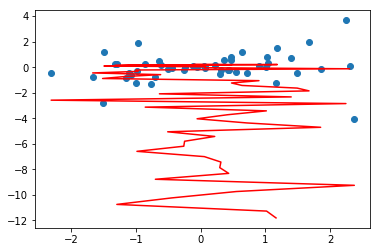

In [17]:
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
p = np.polyfit(x,y,2);
x1 = np.linspace(0,4*np.pi);
y2 = np.polyval(p,x1);
ax.scatter(x, y)
ax.plot(x, y2, color='red')
print(y2)

fig.show()
#test voor mezelf --------------------------------------- eind

[0.00290327 1.54959914]


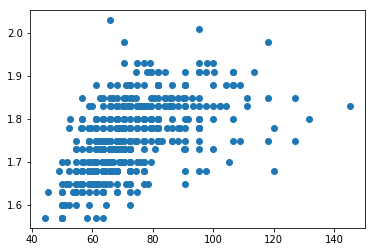

In [18]:
p1 = np.polyfit(MaleWeight, MaleHeights, 1)
print(p1)
plt.plot(MaleWeight, MaleHeights, "o")

In [19]:
p2 = np.polyval(p1, MaleWeight) #Maleweight = x-as, p2 is de y waarde
yfit = p2[0] * MaleWeight * p2[1]
print(yfit.head())


1    191.645105
4    198.496040
6    250.526932
8    239.571471
9    147.853444
Name: Weight (kg), dtype: float64


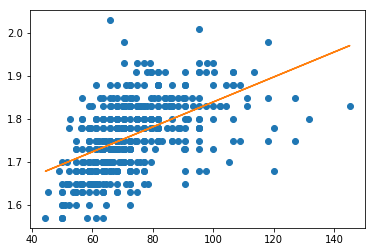

In [20]:
plt.plot(MaleWeight, MaleHeights, "o")
plt.plot(MaleWeight, p2)

pf1 = np.polyfit(MaleWeight, MaleHeights, 2)
pf2 = np.polyfit(MaleWeight, MaleHeights, 3) #kwadratic
p3 = np.polyval(pf1, MaleWeight)
p4 = np.polyval(pf1, MaleWeight)
#print(p4)

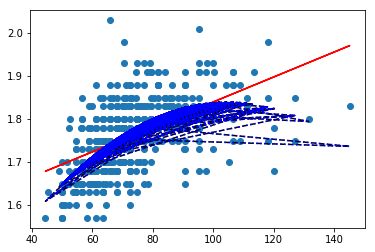

In [21]:
plt.plot(MaleWeight, MaleHeights, "o")
plt.plot(MaleWeight, p2, 'r-')
plt.plot(MaleWeight, p3, 'k--')
plt.plot(MaleWeight, p4, 'b:')

0.27363609233269903


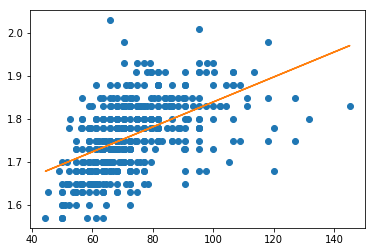

In [22]:
y = MaleHeights
Predict = np.poly1d(p1)

R_Squared = r2_score(y, Predict(MaleWeight))
print(R_Squared)

plt.plot(MaleWeight, MaleHeights, "o")
plt.plot(MaleWeight, p2)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


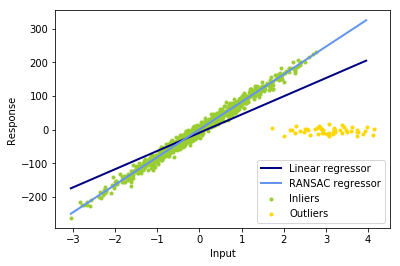

In [35]:
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)


np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)


lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

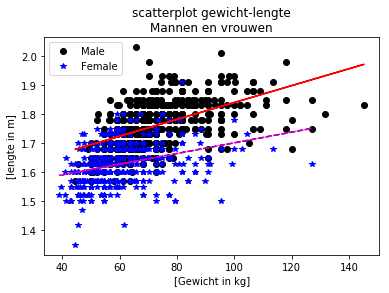

In [23]:
Mp = np.polyfit(MaleWeight, MaleHeights, 1)
Fp = np.polyfit(FemaleWeight, FemaleHeights, 1)
Mp1 = np.polyval(Mp, MaleWeight)
Fp1 = np.polyval(Fp, FemaleWeight)

plt.plot(MaleWeight,MaleHeights, "o", label="Male", color="k")
plt.plot(FemaleWeight,FemaleHeights, "*", label="Female", color="b")

plt.plot(MaleWeight, Mp1, 'r-')
plt.plot(FemaleWeight, Fp1, 'm--')

plt.xlabel("[Gewicht in kg]")
plt.ylabel("[lengte in m]")
plt.title("scatterplot gewicht-lengte\nMannen en vrouwen")
plt.legend()
plt.show()

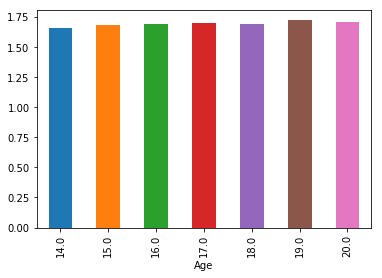

In [25]:
df.groupby('Age')['Height (meter)'].mean().plot(kind='bar')

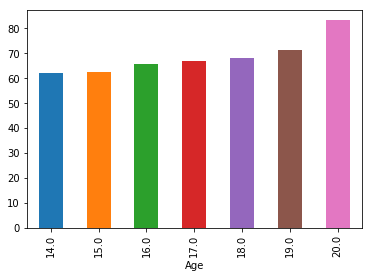

In [26]:
df.groupby('Age')['Weight (kg)'].mean().plot(kind='bar')

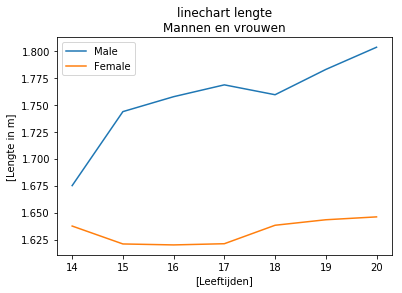

In [27]:
plot = df.groupby(['Gender', 'Age'])['Height (meter)'].mean()#.plot(kind='line')

plt.plot(plot.Male, label='Male')
plt.plot(plot.Female, label='Female')

plt.xlabel("[Leeftijden]")
plt.ylabel("[Lengte in m]")
plt.title("linechart lengte\nMannen en vrouwen")
plt.legend()
plt.show()

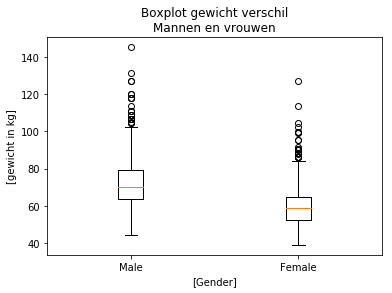

In [28]:
plt.boxplot([MaleWeight, FemaleWeight], labels=["Male", "Female"])
plt.xlabel("[Gender]")
plt.ylabel("[gewicht in kg]")
plt.title("Boxplot gewicht verschil\nMannen en vrouwen")
plt.show()

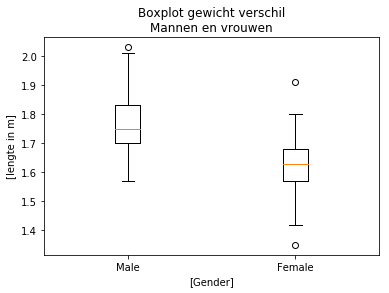

In [29]:
plt.boxplot([MaleHeights, FemaleHeights], labels=["Male", "Female"])
plt.xlabel("[Gender]")
plt.ylabel("[lengte in m]")
plt.title("Boxplot gewicht verschil\nMannen en vrouwen")
plt.show()

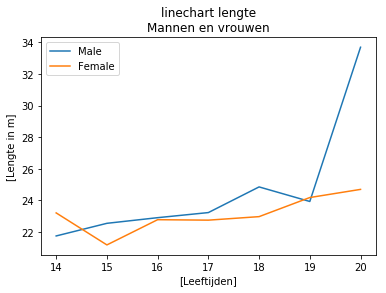

In [30]:
plot = df.groupby(['Gender', 'Age'])['BMIwaarde'].mean()#.plot(kind='line')

plt.plot(plot.Male, label='Male')
plt.plot(plot.Female, label='Female')

plt.xlabel("[Leeftijden]")
plt.ylabel("[Lengte in m]")
plt.title("linechart lengte\nMannen en vrouwen")
plt.legend()
plt.show()